In [12]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np 
import pandas as pd 
import re
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.layers import Conv1D

from keras.initializers import Constant
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import (BatchNormalization,Dense,
                          TimeDistributed, Dropout, Bidirectional,Flatten, GlobalMaxPool1D)
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.utils import shuffle
from keras.utils import to_categorical
import os
from glob import glob 
import numpy as np
import os
import PIL.Image
import tensorflow as tf
import pathlib
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from glob import glob 
pd.set_option('display.max_colwidth', 255)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras_visualizer import visualizer

In [7]:
# Training Val test folders
# # Creating Train / Val / Test folders (One time use)
root_dir = "../Final_Project/Final_project_images/images/images/"   # Root directory, where they all live
train_path = root_dir+'train'  # Since this is binary classification we have a positive and negative
val_path= root_dir+'val'
test_path = root_dir+'test'

print(os.listdir(root_dir))

['Cats', 'Dogs', 'test', 'testab', 'train', 'val']


In [8]:
image_size = 200


train_batch_size = 10
val_batch_size = 10
datagen = ImageDataGenerator(rescale=1.0/255,
                             horizontal_flip=True,
                             vertical_flip=True)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        batch_size=train_batch_size,
                                        
                                        class_mode='binary')

val_gen = datagen.flow_from_directory(val_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        batch_size=val_batch_size,
                                        
                                        class_mode='binary')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

Found 16616 images belonging to 2 classes.
Found 4745 images belonging to 2 classes.
Found 2367 images belonging to 2 classes.


In [9]:
train_path_dogs = root_dir+'train/Dogs'
train_path_cats = root_dir+'train/Cats' # Since this is binary classification we have a positive and negative
val_path_dogs= root_dir+'val/Dogs'
val_path_cats = root_dir +'val/Cats'
test_path_dogs = root_dir+'test/Dogs'
test_path_cats = root_dir+'test/Cats'
## Now to make a dataframe with all of the needed paths
train_df_dogs = pd.DataFrame({'path': glob(os.path.join(train_path_dogs,'*.jpg'))})
train_df_cats = pd.DataFrame({'path': glob(os.path.join(train_path_cats,'*.jpg'))})
val_df_dogs = pd.DataFrame({'path': glob(os.path.join(val_path_dogs,'*.jpg'))})
val_df_cats = pd.DataFrame({'path': glob(os.path.join(val_path_cats,'*.jpg'))})
test_df_dogs = pd.DataFrame({'path': glob(os.path.join(test_path_dogs,'*.jpg'))})
test_df_cats = pd.DataFrame({'path': glob(os.path.join(test_path_cats,'*.jpg'))})
train_df_dogs['label']= 0
train_df_cats['label']= 1
val_df_dogs['label'] = 0
val_df_cats['label'] = 1
test_df_dogs['label'] = 0
test_df_cats['label'] = 1

train_df = shuffle(pd.concat([train_df_dogs, train_df_cats], axis=0).reset_index(drop=True))
val_df = shuffle(pd.concat([val_df_dogs, val_df_cats], axis=0).reset_index(drop=True))
test_df = shuffle(pd.concat([test_df_dogs,test_df_cats],axis = 0).reset_index(drop=True))

Changed dropout conv to 0.2

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128

dropout_conv = 0.2
dropout_dense = 0.3

model4 = Sequential()
model4.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(Dropout(dropout_conv))


model4.add(Conv2D(second_filter, kernel_size, use_bias=False))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_conv))


model4.add(Conv2D(third_filter, kernel_size, use_bias=False))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_conv))


model4.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_conv))

model4.add(Flatten())
model4.add(Dense(256, use_bias=False))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_dense))
model4.add(Dense(1, activation = "sigmoid"))


model4.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 99, 99, 16)        64        
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 16)        0         
 g2D)                                                            
                                                      

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=6, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, verbose = 1, patience = 1,min_lr = 0.000000001)
model_4 = model4.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
1022/1662 [=================>............] - ETA: 59s - loss: 0.6826 - accuracy: 0.6240

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 191s 115ms/step - loss: 0.6528 - accuracy: 0.6448 - val_loss: 0.7742 - val_accuracy: 0.5608 - lr: 0.0010
Epoch 2/50
1662/1662 [==============================] - 86s 52ms/step - loss: 0.5511 - accuracy: 0.7219 - val_loss: 0.5969 - val_accuracy: 0.6913 - lr: 0.0010
Epoch 3/50
1662/1662 [==============================] - ETA: 0s - loss: 0.5090 - accuracy: 0.7524
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1662/1662 [==============================] - 88s 53ms/step - loss: 0.5090 - accuracy: 0.7524 - val_loss: 0.6117 - val_accuracy: 0.6683 - lr: 0.0010
Epoch 4/50
1662/1662 [==============================] - 89s 54ms/step - loss: 0.4678 - accuracy: 0.7770 - val_loss: 0.5806 - val_accuracy: 0.7037 - lr: 5.0000e-04
Epoch 5/50
1662/1662 [==============================] - 90s 54ms/step - loss: 0.4553 - accuracy: 0.7879 - val_loss: 0.4944 - val_accuracy: 0.7465 - lr: 5.0000e-04
Epoch 6/50
1661/1662 [=====================

In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
y_pred = model4.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 20s 8ms/step


0.937861969111969

In [25]:
model_4.history['accuracy']

[0.6392633318901062,
 0.7059460878372192,
 0.7303803563117981,
 0.7446436882019043,
 0.7670317888259888,
 0.7800914645195007,
 0.7937530279159546,
 0.8079561591148376,
 0.8142152428627014,
 0.8133124709129333,
 0.8165021538734436,
 0.8181270956993103]

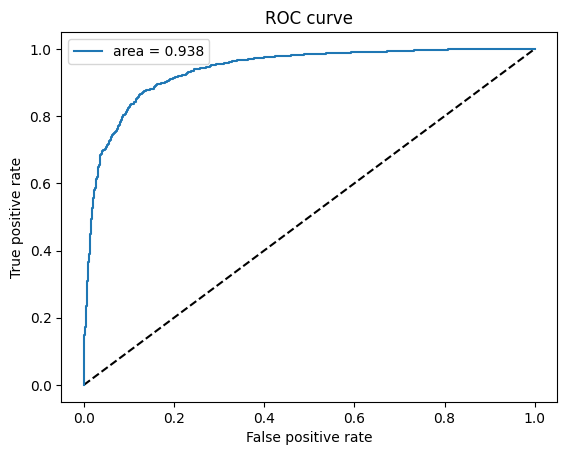

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData_4_mod_1')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table4_changes')

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128

dropout_conv = 0.2
dropout_dense = 0.3

model4_ = Sequential()
model4_.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model4_.add(MaxPool2D(pool_size = pool_size))
model4_.add(BatchNormalization())
model4_.add(Activation("relu"))
model4_.add(MaxPool2D(pool_size = pool_size))
model4_.add(Dropout(dropout_conv))


model4_.add(Conv2D(second_filter, kernel_size, use_bias=False))
model4_.add(MaxPool2D(pool_size = pool_size))
model4_.add(BatchNormalization())
model4_.add(Activation("sigmoid"))
model4_.add(Dropout(dropout_conv))


model4_.add(Conv2D(third_filter, kernel_size, use_bias=False))
model4_.add(MaxPool2D(pool_size = pool_size))
model4_.add(BatchNormalization())
model4_.add(Activation("relu"))
model4_.add(Dropout(dropout_conv))


model4_.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model4_.add(MaxPool2D(pool_size = pool_size))
model4_.add(BatchNormalization())
model4_.add(Activation("relu"))
model4_.add(Dropout(dropout_conv))

model4_.add(Flatten())
model4_.add(Dense(256, use_bias=False))
model4_.add(BatchNormalization())
model4_.add(Activation("relu"))
model4_.add(Dropout(dropout_dense))
model4_.add(Dense(1, activation = "sigmoid"))


model4_.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])
print(model4_.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                      

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=6, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, verbose = 1, patience = 1,min_lr = 0.000000001)
model_4 = model4_.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
 542/1662 [========>.....................] - ETA: 55s - loss: 0.7109 - accuracy: 0.5934

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 90s 53ms/step - loss: 0.6513 - accuracy: 0.6393 - val_loss: 0.8773 - val_accuracy: 0.5673 - lr: 0.0010
Epoch 2/50
1662/1662 [==============================] - 87s 52ms/step - loss: 0.5670 - accuracy: 0.7059 - val_loss: 0.6874 - val_accuracy: 0.6596 - lr: 0.0010
Epoch 3/50
1662/1662 [==============================] - 87s 52ms/step - loss: 0.5407 - accuracy: 0.7304 - val_loss: 0.6349 - val_accuracy: 0.6632 - lr: 0.0010
Epoch 4/50
1662/1662 [==============================] - 87s 53ms/step - loss: 0.5181 - accuracy: 0.7446 - val_loss: 0.5329 - val_accuracy: 0.7370 - lr: 0.0010
Epoch 5/50
1662/1662 [==============================] - ETA: 0s - loss: 0.4905 - accuracy: 0.7670
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1662/1662 [==============================] - 88s 53ms/step - loss: 0.4905 - accuracy: 0.7670 - val_loss: 0.5655 - val_accuracy: 0.7144 - lr: 0.0010
Epoch 6/50
1662/1662 [==============================]

In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
y_pred = model4_.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.8827605606451759

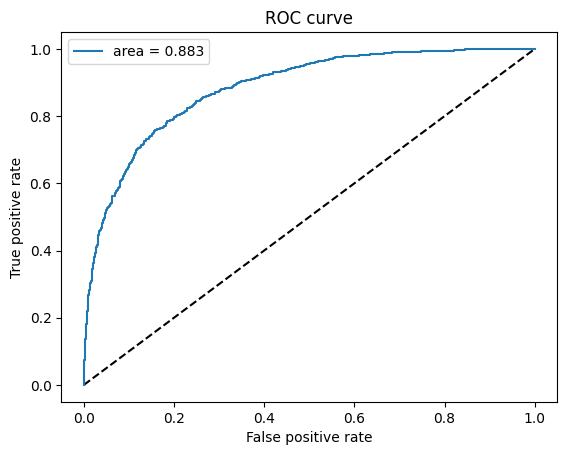

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData_4_mod_1')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table4___changes')

In [26]:
image_size = 200


train_batch_size = 20
val_batch_size = 20
datagen = ImageDataGenerator(rescale=1.0/255,
                             horizontal_flip=True,
                             vertical_flip=True)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        batch_size=train_batch_size,
                                        
                                        class_mode='binary')

val_gen = datagen.flow_from_directory(val_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        batch_size=val_batch_size,
                                        
                                        class_mode='binary')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

Found 16616 images belonging to 2 classes.
Found 4745 images belonging to 2 classes.
Found 2367 images belonging to 2 classes.


In [29]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128

dropout_conv = 0.2
dropout_dense = 0.3

model4_1 = Sequential()
model4_1.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model4_1.add(MaxPool2D(pool_size = pool_size))
model4_1.add(BatchNormalization())
model4_1.add(Activation("relu"))
model4_1.add(MaxPool2D(pool_size = pool_size))
model4_1.add(Dropout(dropout_conv))


model4_1.add(Conv2D(second_filter, kernel_size, use_bias=False))
model4_1.add(MaxPool2D(pool_size = pool_size))
model4_1.add(BatchNormalization())
model4_1.add(Activation("relu"))
model4_1.add(Dropout(dropout_conv))


model4_1.add(Conv2D(third_filter, kernel_size, use_bias=False))
model4_1.add(MaxPool2D(pool_size = pool_size))
model4_1.add(BatchNormalization())
model4_1.add(Activation("relu"))
model4_1.add(Dropout(dropout_conv))


model4_1.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model4_1.add(MaxPool2D(pool_size = pool_size))
model4_1.add(BatchNormalization())
model4_1.add(Activation("relu"))
model4_1.add(Dropout(dropout_conv))

model4_1.add(Flatten())
model4_1.add(Dense(256, use_bias=False))
model4_1.add(BatchNormalization())
model4_1.add(Activation("relu"))
model4_1.add(Dropout(dropout_dense))
model4_1.add(Dense(1, activation = "sigmoid"))


model4_1.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])
print(model4_1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_20 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                      

In [30]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=6, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.5, verbose = 1, patience = 1,min_lr = 0.000000001)
model_4_3 = model4_1.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
831/831 [==============================] - 84s 99ms/step - loss: 0.6305 - accuracy: 0.6633 - val_loss: 0.6237 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 2/50
831/831 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.7399
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
831/831 [==============================] - 82s 98ms/step - loss: 0.5271 - accuracy: 0.7399 - val_loss: 0.8008 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 3/50
831/831 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.7771
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
831/831 [==============================] - 85s 102ms/step - loss: 0.4729 - accuracy: 0.7771 - val_loss: 0.6720 - val_accuracy: 0.6430 - lr: 5.0000e-04
Epoch 4/50
831/831 [==============================] - 80s 96ms/step - loss: 0.4408 - accuracy: 0.7938 - val_loss: 0.5272 - val_accuracy: 0.7273 - lr: 2.5000e-04
Epoch 5/50
831/831 [=====================

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
y_pred = model4_1.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.9085838797377259

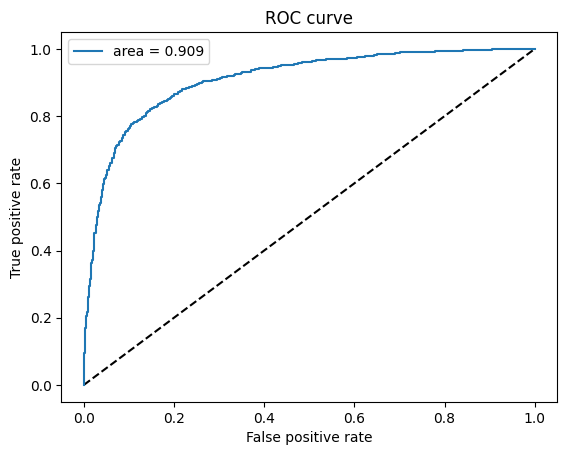

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData_4_mod_1')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table4___4changes')